In [1]:
!pip install git+https://github.com/kunguz/odak.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/kunguz/odak.git to /tmp/pip-req-build-_jxln8_k
  Running command git clone -q https://github.com/kunguz/odak.git /tmp/pip-req-build-_jxln8_k
     |████████████████████████████████| 3.1 MB 5.1 MB/s 
  Created wheel for odak: filename=odak-0.2.1-py3-none-any.whl size=116322 sha256=9b8da2b56f078acbf67ab64e4f3d24705a1b2ea884a7d22ec8c38d1166d93e99
  Stored in directory: /tmp/pip-ephem-wheel-cache-o3_od8p2/wheels/5b/1f/1a/1d2de547c1d893422b054c9aea06da6ce4efbf401114444959
Successfully built odak
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [2]:
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt
import odak 
import math


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


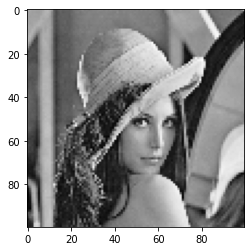

In [15]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/IP Labs/Images/Lenna.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray= cv2.resize(img_gray, (100, 100))
img_G= torch.tensor(img_gray)
plt.imshow(img_gray, cmap='gray')

In [19]:
def aperture_array(dimensions=[0.01, 0.015], pixel_count=[100, 100], Z=0.):
        x = torch.linspace(-dimensions[0]/2., dimensions[0]/2., pixel_count[0])
        y = torch.linspace(-dimensions[1]/2., dimensions[1]/2., pixel_count[1])
        X, Y = torch.meshgrid(x, y, indexing='ij')
        aperture_array_locations = torch.zeros(X.shape[0], X.shape[1], 3)
        aperture_array_locations[:, :, 0] = X
        aperture_array_locations[:, :, 1] = Y
        aperture_array_locations[:, :, 2] = Z
        aperture_array = torch.rand(X.shape[0], X.shape[1], requires_grad=True)

        return aperture_array_locations, aperture_array

In [22]:

dimensions = [0.01, 0.015]
pixel_count= [100, 100]
Z= 0.01
x = torch.linspace(-dimensions[0], dimensions[0], pixel_count[0])
y = torch.linspace(-dimensions[1], dimensions[1], pixel_count[1])
X, Y = torch.meshgrid(x, y, indexing='ij')
Points = torch.zeros(X.shape[0], X.shape[1], 3)
Points[:, :, 0] = X
Points[:, :, 1] = Y
Points[:, :, 2] = Z

# abitrary points of intersection randomly generated
Points= Points.view(-1, 3) 
array_loc, array= aperture_array()
# Location of aperture array
array_loc= array_loc.view(-1, 3)

Points_data = img_G.view(-1, 1)*array.view(-1,1)

def camera(Points_data , Points): 

  # Intersection points and paint an image on a detector?
  detector_image = torch.zeros_like(Points_data)
  for point_ID, point in enumerate(Points):
    dist = torch.sqrt(torch.sum((array_loc-point)**2, dim =1))
    # min_ID = ...
    min_ID  = torch.argmin(dist)
    # Take minimum Id and register to pixel 
    detector_image[min_ID] = Points_data[point_ID]

  detector_image=detector_image.view(100, 100)
  return detector_image


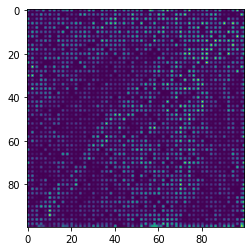

In [23]:
cam = camera(Points_data , Points)
plt.imshow(cam.detach().numpy())